Loading data...
Encoding categorical variables...
Saving preprocessed data...
Running Decision Tree...
Decision Tree Accuracy: 0.9458375125376128
Decision Tree plot saved as 'decision_tree.png'


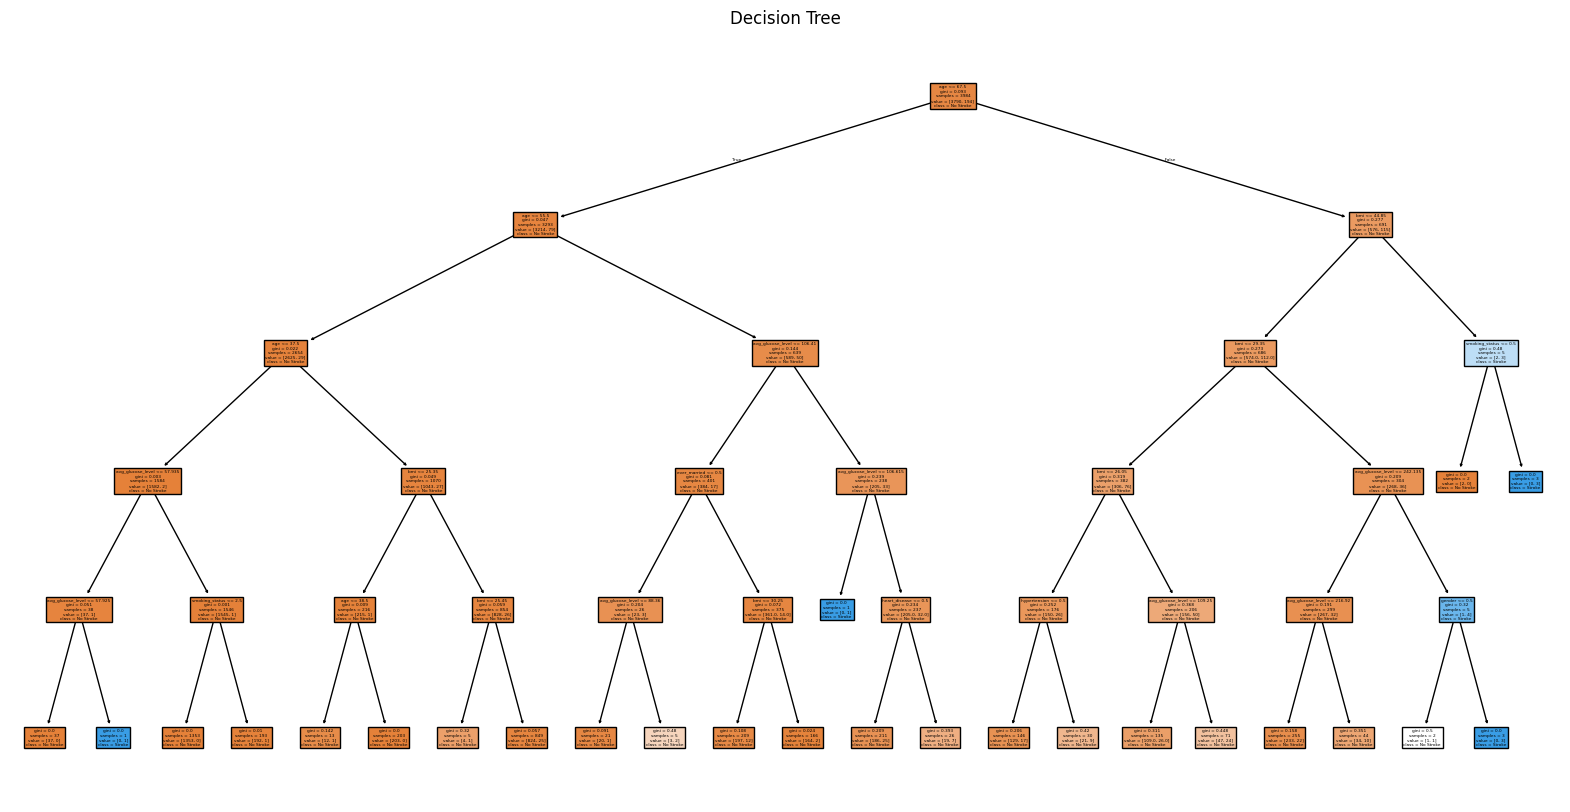

Confusion Matrix plot saved as 'confusion_matrix.png'


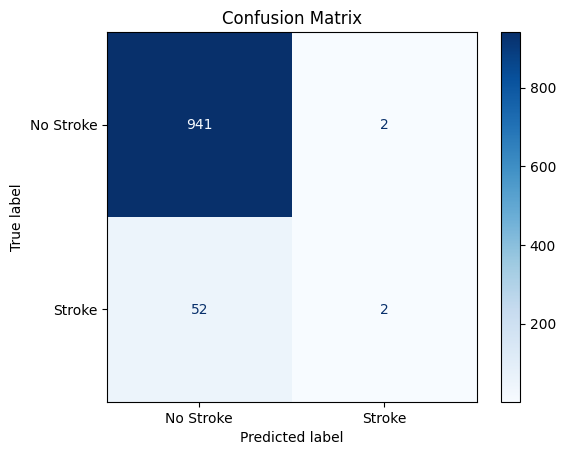

Running K-Means Clustering...
K-Means Clustering plot saved as 'kmeans_clustering.png'


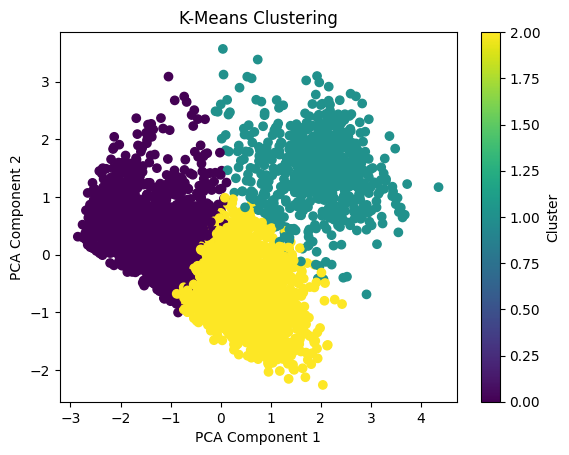

Running Association Rules...
Error while generating association rules: association_rules() missing 1 required positional argument: 'num_itemsets'
Running Artificial Neural Network...


c:\Users\Prashant Deuja\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9179 - loss: 0.2566 - val_accuracy: 0.9458 - val_loss: 0.1788
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9455 - loss: 0.1690 - val_accuracy: 0.9458 - val_loss: 0.1820
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9493 - loss: 0.1597 - val_accuracy: 0.9448 - val_loss: 0.1743
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9479 - loss: 0.1622 - val_accuracy: 0.9418 - val_loss: 0.1811
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9527 - loss: 0.1509 - val_accuracy: 0.9458 - val_loss: 0.1820
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9506 - loss: 0.1544 - val_accuracy: 0.9448 - val_loss: 0.1781
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9506 - loss: 0.1516 - val_accuracy: 0.9448 - val_loss: 0.1903
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9497 - loss: 0.1502 - val_accuracy: 0.

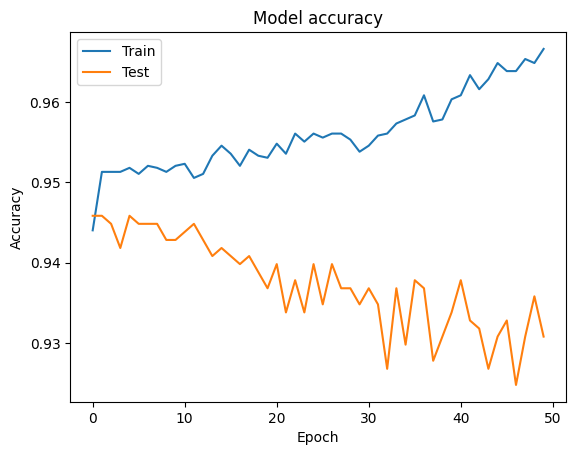

ANN loss plot saved as 'ann_loss.png'


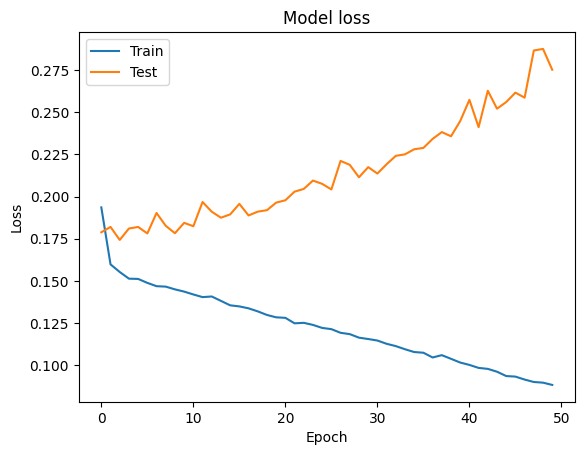

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from mlxtend.frequent_patterns import apriori, association_rules

def load_and_preprocess_data():
    print("Loading data...")
    data = pd.read_csv('data/stroke_data.csv')
    
    print("Encoding categorical variables...")
    label_encoder = LabelEncoder()
    categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    for col in categorical_columns:
        data[col] = label_encoder.fit_transform(data[col])
    
    print("Saving preprocessed data...")
    data.to_csv('data/preprocessed_stroke_data.csv', index=False)
    return data

def run_decision_tree(data):
    print("Running Decision Tree...")
    X = data.drop('stroke', axis=1)
    y = data['stroke']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree Accuracy: {accuracy}')
    
    # Plot decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
    plt.title('Decision Tree')
    plt.savefig('decision_tree.png')
    print("Decision Tree plot saved as 'decision_tree.png'")
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    print("Confusion Matrix plot saved as 'confusion_matrix.png'")
    plt.show()

def run_kmeans(data):
    print("Running K-Means Clustering...")
    scaler = StandardScaler()
    features = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features)
    data['cluster'] = clusters

    # PCA for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('K-Means Clustering')
    plt.colorbar(label='Cluster')
    plt.savefig('kmeans_clustering.png')
    print("K-Means Clustering plot saved as 'kmeans_clustering.png'")
    plt.show()

# Association Rules
def run_association_rules(data):
    print("Running Association Rules...")

    # Convert dataset to binary (True/False) for apriori
    data_bool = data.drop('stroke', axis=1).astype(bool)

    # Generate frequent itemsets
    frequent_itemsets = apriori(data_bool, min_support=0.1, use_colnames=True)

    # Check if itemsets were generated
    if frequent_itemsets.empty:
        print("No frequent itemsets found with the given parameters.")
        return

    # Generate association rules
    try:
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    except TypeError as e:
        print(f"Error while generating association rules: {e}")
        return

    print(rules)

    # Plot support vs confidence
    if not rules.empty:
        plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Support vs Confidence')
        plt.savefig('support_vs_confidence.png')
        print("Support vs Confidence plot saved as 'support_vs_confidence.png'")
        plt.show()

        # Plot support vs lift
        plt.scatter(rules['support'], rules['lift'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Lift')
        plt.title('Support vs Lift')
        plt.savefig('support_vs_lift.png')
        print("Support vs Lift plot saved as 'support_vs_lift.png'")
        plt.show()
    else:
        print("No association rules were generated.")

def run_ann(data):
    print("Running Artificial Neural Network...")
    X = data.drop('stroke', axis=1)
    y = data['stroke']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('ann_accuracy.png')
    print("ANN accuracy plot saved as 'ann_accuracy.png'")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('ann_loss.png')
    print("ANN loss plot saved as 'ann_loss.png'")
    plt.show()

def main():
    data = load_and_preprocess_data()
    run_decision_tree(data)
    run_kmeans(data)
    run_association_rules(data)
    run_ann(data)

if __name__ == "__main__":
    main()